In [1]:
!git clone https://github.com/shadow2496/VITON-HD.git
%cd ./VITON-HD/

Cloning into 'VITON-HD'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 49 (delta 10), reused 7 (delta 6), pack-reused 31 (from 1)
Receiving objects: 100% (49/49), 5.03 MiB | 23.00 MiB/s, done.
Resolving deltas: 100% (17/17), done.
/kaggle/working/VITON-HD


In [2]:
pip install torchgeometry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
!cp -r /kaggle/input/viton-hd-dataset-2/checkpoints-20250203T195214Z-001/checkpoints /kaggle/working/VITON-HD/

In [7]:
!ls /kaggle/working/VITON-HD/checkpoints

alias_final.pth  gmm_final.pth	seg_final.pth


In [8]:
!cp -r /kaggle/input/viton-hd-dataset-2/datasets/datasets /kaggle/working/VITON-HD/

In [15]:
!ls /kaggle/working/VITON-HD/datasets

test  test_pairs.txt


In [11]:
!CUDA_VISIBLE_DEVICES=1 python test.py --name viton_hd

Namespace(name='viton_hd', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets/', dataset_mode='test', dataset_list='test_pairs.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/kaggle/working/VITON-HD/utils.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary

In [17]:
!ls /kaggle/working/VITON-HD/results/viton_hd

00891_01430_00.jpg  07445_06429_00.jpg	08909_02783_00.jpg
03615_09933_00.jpg  07573_11791_00.jpg	10549_01260_00.jpg


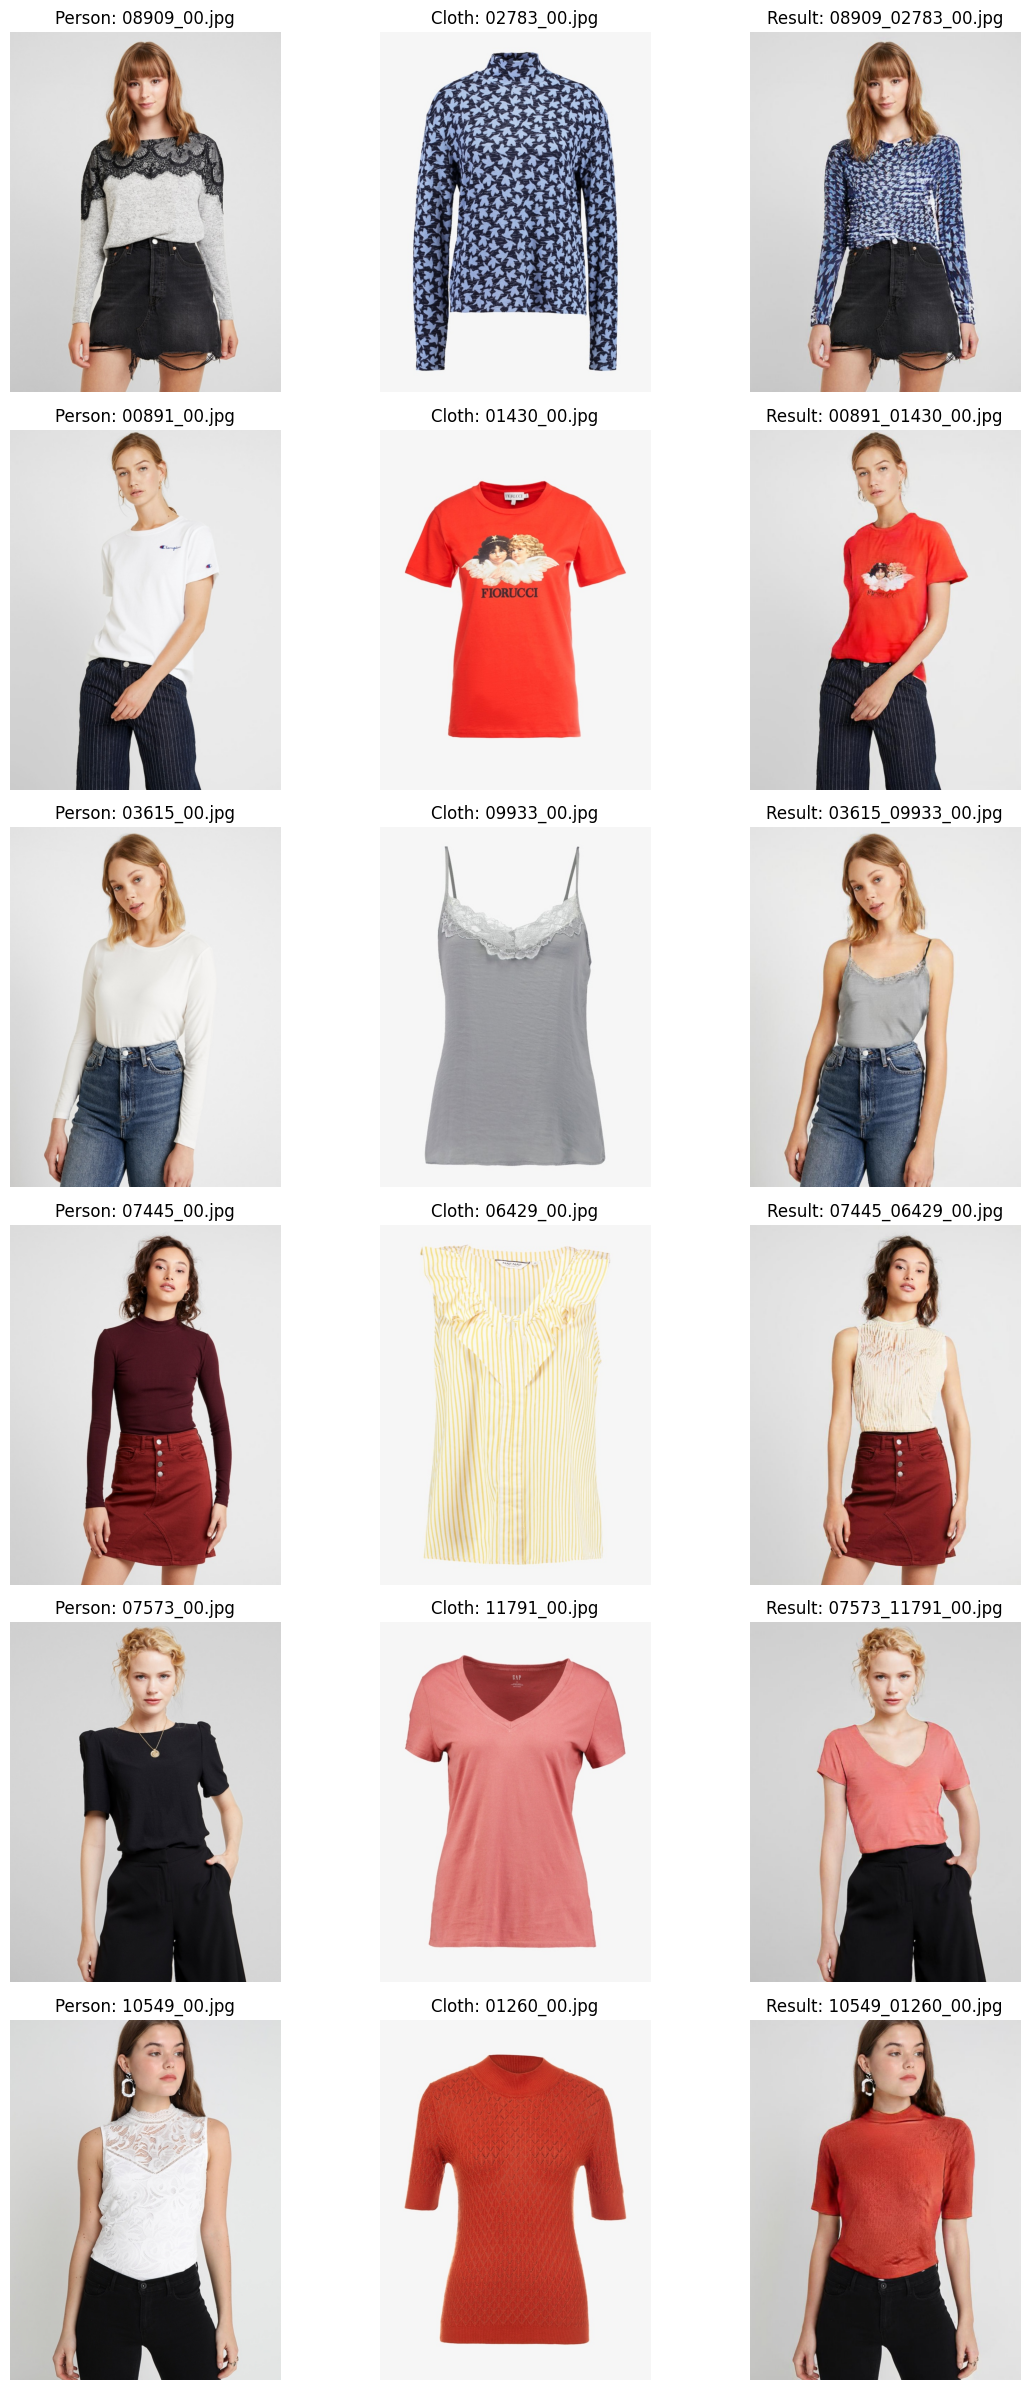

In [22]:
import cv2
import matplotlib.pyplot as plt
import os

# Define paths
test_pairs_path = "/kaggle/working/VITON-HD/datasets/test_pairs.txt"
person_image_dir = "/kaggle/working/VITON-HD/datasets/test/image/"
cloth_image_dir = "/kaggle/working/VITON-HD/datasets/test/cloth/"
result_image_dir = "/kaggle/working/VITON-HD/results/viton_hd"


# Read test pairs file
with open(test_pairs_path, "r") as f:
    pairs = [line.strip().split() for line in f.readlines()]

# Get available result image names
result_files = os.listdir(result_image_dir)

# Function to find a result image that matches the first 5 characters of the person image
def find_result_image(person_name):
    prefix = person_name[:5]  # Extract first 5 characters
    for file in result_files:
        if file.startswith(prefix):  # Check if result image starts with the same prefix
            return file
    return None  # No match found

# Display all images
num_images = len(pairs)
fig, axes = plt.subplots(num_images, 3, figsize=(12, 4 * num_images))

for i, (person, cloth) in enumerate(pairs):
    # Find the correct result image based on the first 5 characters
    result_image_name = find_result_image(person)
    
    if result_image_name is None:
        print(f"⚠️ No result image found for {person} (Prefix: {person[:5]})")
        continue  # Skip if no match is found

    # Construct full paths
    person_path = os.path.join(person_image_dir, person)
    cloth_path = os.path.join(cloth_image_dir, cloth)
    result_path = os.path.join(result_image_dir, result_image_name)

    # Check if images exist before reading
    if not os.path.exists(person_path):
        print(f"❌ Person image not found: {person_path}")
        continue
    if not os.path.exists(cloth_path):
        print(f"❌ Cloth image not found: {cloth_path}")
        continue
    if not os.path.exists(result_path):
        print(f"❌ Result image not found: {result_path}")
        continue

    # Load images
    person_img = cv2.imread(person_path)
    cloth_img = cv2.imread(cloth_path)
    result_img = cv2.imread(result_path)

    # Ensure images were loaded correctly
    if person_img is None or cloth_img is None or result_img is None:
        print(f"⚠️ Error loading one of the images: {person_path}, {cloth_path}, {result_path}")
        continue

    # Convert images from BGR to RGB
    person_img = cv2.cvtColor(person_img, cv2.COLOR_BGR2RGB)
    cloth_img = cv2.cvtColor(cloth_img, cv2.COLOR_BGR2RGB)
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    # Plot images
    axes[i, 0].imshow(person_img)
    axes[i, 0].set_title(f"Person: {person}")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(cloth_img)
    axes[i, 1].set_title(f"Cloth: {cloth}")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(result_img)
    axes[i, 2].set_title(f"Result: {result_image_name}")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()




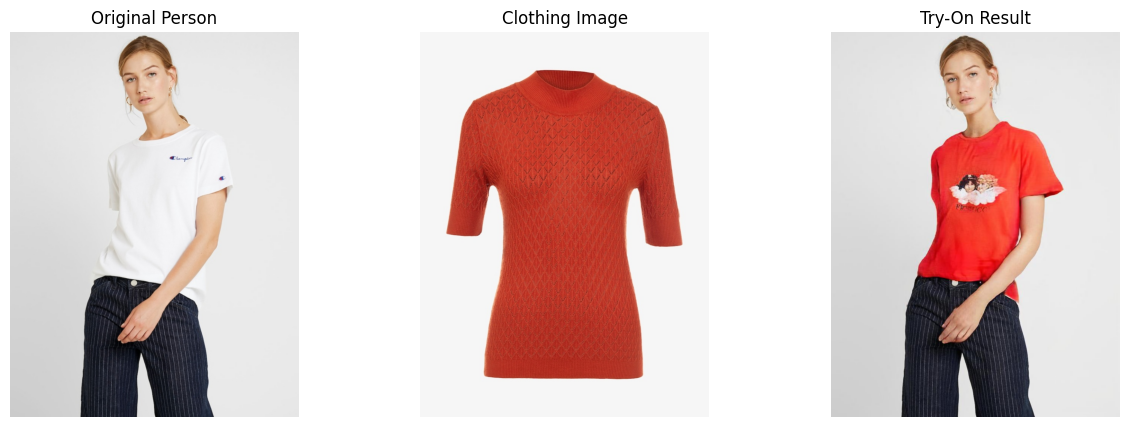

In [18]:
import cv2
import matplotlib.pyplot as plt

# File paths (update with actual file names)
person_image_path = "/kaggle/working/VITON-HD/datasets/test/image/00891_00.jpg"
cloth_image_path = "/kaggle/working/VITON-HD/datasets/test/cloth/01260_00.jpg"
result_image_path = "/kaggle/working/VITON-HD/results/viton_hd/00891_01430_00.jpg"  # Update based on your test run

# Load images using OpenCV (BGR to RGB conversion)
person_image = cv2.cvtColor(cv2.imread(person_image_path), cv2.COLOR_BGR2RGB)
cloth_image = cv2.cvtColor(cv2.imread(cloth_image_path), cv2.COLOR_BGR2RGB)
result_image = cv2.cvtColor(cv2.imread(result_image_path), cv2.COLOR_BGR2RGB)

# Plot images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(person_image)
axes[0].set_title("Original Person")
axes[0].axis("off")

axes[1].imshow(cloth_image)
axes[1].set_title("Clothing Image")
axes[1].axis("off")

axes[2].imshow(result_image)
axes[2].set_title("Try-On Result")
axes[2].axis("off")

plt.show()


In [ ]:
import shutil

# Compress the results folder into a zip file
#shutil.make_archive("/kaggle/working/VITON-HD/results/viton_hd", 'zip', "results")

# Now, download "viton_results.zip" manually from Kaggle


In [2]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
!cd openpose


Cloning into 'openpose'...
remote: Enumerating objects: 16156, done.
remote: Total 16156 (delta 0), reused 0 (delta 0), pack-reused 16156 (from 1)
Receiving objects: 100% (16156/16156), 84.46 MiB | 37.10 MiB/s, done.
Resolving deltas: 100% (11324/11324), done.


In [ ]:
# Run OpenPose (adjust paths as necessary)
./build/examples/openpose/openpose.bin --image_dir <path_to_person_images> --write_images <output_image_folder> --write_json <output_json_folder> --display 0